<a href="https://colab.research.google.com/github/KareemYaseen/KareemYaseen/blob/main/A5_2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Cairo University Faculty of Engineering
## Deep Learning 
## Assignment 5_2

---

Please write your full name here
- **Name** : "Karim Mostafa Yaseen"

## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. 
Within this notebook you will find instructions in each section for how to complete the assignment. 

Pay close attention to the instructions. Feel free to add extra cells into the notebook as required.

### Let's get started!

We'll start by running some imports, and loading the dataset. You are free to make further imports throughout the notebook as you wish. 

In [108]:
import tensorflow as tf
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from tensorflow.python.keras.layers import Conv2D , MaxPooling2D , Dense , Dropout ,Flatten
from tensorflow.python.keras import Sequential 
import pandas as pd
%matplotlib inline

For this assignmnet, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. 

- If using Colab: You should store these files in Drive.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [40]:
### Using Colab only
# Run this cell to connect to your Drive folder

from google.colab import drive
!wget "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
!wget "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"

--2022-12-11 14:15:36--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat.3’

train_32x32.mat.3   100%[===================>] 173.61M  48.7MB/s    in 5.5s    

2022-12-11 14:15:42 (31.9 MB/s) - ‘train_32x32.mat.3’ saved [182040794/182040794]

--2022-12-11 14:15:42--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat.3’

test_32x32.mat.3    100%[===================>]  61.30M  18.4MB/s    in 3.3s    

2022-12-11 14:15:46 (18.4 MB/s) - ‘test_32x32.mat.3’ saved [642

In [41]:
# Load the dataset from your Drive folder

train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [86]:
train_x , train_y = train['X'] , train['y']
test_x , test_y = test['X'] ,test['y']

train_y[train_y == 10] = 0
test_y[test_y == 10] = 0

In [87]:
train_x.shape

(32, 32, 3, 73257)

In [88]:
train_x = np.transpose(train_x,(3 ,0 ,1,2))
test_x = np.transpose(test_x,(3 ,0 ,1,2))

print("Train x shape : {}\nTest x shape : {}".format(train_x.shape,test_x.shape))

Train x shape : (73257, 32, 32, 3)
Test x shape : (26032, 32, 32, 3)


In [89]:
train_x = train_x / 255
test_x = test_x / 255

In [90]:
def show_pictures_colored(indices,tset,tlabel):
    
    fig , axlist = plt.subplots(ncols = 5 , nrows = 4 )
    
    for ind , pind in enumerate(indices):
        
        axlist.ravel()[ind].set_axis_off()
        axlist.ravel()[ind].set_title('{}'.format(tlabel[pind]))
        axlist.ravel()[ind].imshow(tset[pind])
    fig.tight_layout()

def show_pictures_grey(indices,tset,tlabel):
    
    fig , axlist = plt.subplots(ncols = 5 , nrows = 4 )
    
    for ind , pind in enumerate(indices):
        
        axlist.ravel()[ind].set_axis_off()
        axlist.ravel()[ind].set_title('{}'.format(tlabel[pind]))
        axlist.ravel()[ind].imshow(tset[pind,:,:,0])
    fig.tight_layout()

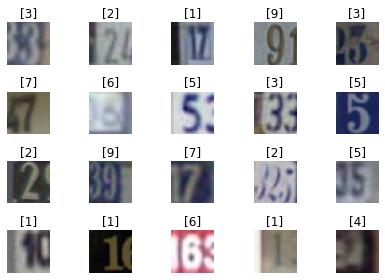

In [91]:
indices = list(np.random.randint(1,train_x.shape[0],size=(20,)) )
show_pictures_colored(indices,train_x,train_y)

In [92]:
train_x_grey = np.mean(train_x,keepdims=True,axis = -1)
test_x_grey = np.mean(test_x,keepdims=True,axis = -1)
train_x_grey.shape

(73257, 32, 32, 1)

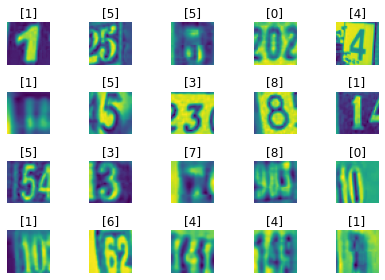

In [93]:
indices = list(np.random.randint(1,train_x.shape[0],size=(20,)) )
show_pictures_grey(indices , train_x_grey , train_y)

In [94]:
from sklearn.model_selection import train_test_split

train_x , val_x , train_y , val_y = train_test_split(train_x_grey,train_y, test_size = 0.04 )

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least one callback during training, like a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [95]:
def get_model():
    model = Sequential([
        Flatten(input_shape=(32,32,1)),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dense(10,activation="softmax")
        
    ])
    return model

In [96]:
model = get_model()


In [97]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 74,570
Trainable params: 74,570
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [99]:
from tensorflow.python.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau

callback_best = ModelCheckpoint('model/best_model' , save_best_only= True ,save_weights_only=True , monitor="val_accuracy" )
reduceLRplat = ReduceLROnPlateau(monitor="val_loss",patience=5)

In [100]:
from keras.utils.np_utils import to_categorical

train_y_cat = to_categorical(train_y,10)

val_y_cat = to_categorical(val_y,10)

In [101]:
history = model.fit(train_x,train_y_cat,validation_data=(val_x,val_y_cat) , verbose = 2 , epochs=20 , batch_size= 128 ,callbacks=[callback_best , reduceLRplat])

Epoch 1/20
550/550 - 3s - loss: 2.1110 - accuracy: 0.2436 - val_loss: 1.7756 - val_accuracy: 0.3842
Epoch 2/20
550/550 - 2s - loss: 1.5074 - accuracy: 0.4877 - val_loss: 1.3852 - val_accuracy: 0.5404
Epoch 3/20
550/550 - 2s - loss: 1.3060 - accuracy: 0.5711 - val_loss: 1.2546 - val_accuracy: 0.5923
Epoch 4/20
550/550 - 2s - loss: 1.2343 - accuracy: 0.5998 - val_loss: 1.2181 - val_accuracy: 0.5967
Epoch 5/20
550/550 - 2s - loss: 1.1743 - accuracy: 0.6254 - val_loss: 1.1316 - val_accuracy: 0.6459
Epoch 6/20
550/550 - 2s - loss: 1.1239 - accuracy: 0.6467 - val_loss: 1.1571 - val_accuracy: 0.6377
Epoch 7/20
550/550 - 2s - loss: 1.0891 - accuracy: 0.6601 - val_loss: 1.1107 - val_accuracy: 0.6493
Epoch 8/20
550/550 - 2s - loss: 1.0551 - accuracy: 0.6708 - val_loss: 1.0820 - val_accuracy: 0.6626
Epoch 9/20
550/550 - 2s - loss: 1.0247 - accuracy: 0.6819 - val_loss: 1.0341 - val_accuracy: 0.6783
Epoch 10/20
550/550 - 2s - loss: 1.0035 - accuracy: 0.6896 - val_loss: 1.0512 - val_accuracy: 0.6762

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model **must** use fewer trainable parameters than your MLP model.
* Compile and train the model (recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least one callback during training, like a ModelCheckpoint callback.
* **You should aim to beat the MLP model performance with fewer parameters!**
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [110]:
def get_cnn_model():
    model = Sequential([
        
        #Layer 1
        
        Conv2D(6,5,input_shape=(32,32,1)),
        tf.keras.layers.BatchNormalization(),
        MaxPooling2D(2,strides = 2),
        
        #Regularization
         
        Dropout(0.3), 
        
        # Layer2
        
        Conv2D(16,5),
        tf.keras.layers.BatchNormalization(),
        MaxPooling2D(2),
        
        #Regularization
         
        Dropout(0.3), 
        
        #Fully Connected
        
        Flatten(),
        
        Dense(120,activation = 'relu'),
        Dense(84,activation = 'relu'),
        
        Dense(10,activation= 'softmax')       
        
    ])
    
    return model

In [111]:
model_cnn = get_cnn_model()


In [112]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 28, 28, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 10, 10, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)         

In [113]:
model_cnn.compile(loss = "categorical_crossentropy" , optimizer = 'adam' , metrics = ['accuracy'])

In [116]:
from tensorflow.python.keras.callbacks import CSVLogger
callback_best_cnn = ModelCheckpoint('model_cnn/best_model' ,save_best_only=True ,  save_weights_only=True , monitor="val_accuracy" )
csvlogger = CSVLogger('model_cnn.csv')


In [117]:
history_cnn = model_cnn.fit(train_x,train_y_cat,validation_data=(val_x,val_y_cat) ,verbose = 2 , epochs=20 , batch_size= 128 ,callbacks=[callback_best_cnn , csvlogger])

Epoch 1/20
550/550 - 54s - loss: 0.6699 - accuracy: 0.7969 - val_loss: 0.5370 - val_accuracy: 0.8383
Epoch 2/20
550/550 - 53s - loss: 0.5865 - accuracy: 0.8224 - val_loss: 0.4839 - val_accuracy: 0.8526
Epoch 3/20
550/550 - 55s - loss: 0.5365 - accuracy: 0.8379 - val_loss: 0.5257 - val_accuracy: 0.8383
Epoch 4/20
550/550 - 53s - loss: 0.5083 - accuracy: 0.8452 - val_loss: 0.4297 - val_accuracy: 0.8635
Epoch 5/20
550/550 - 53s - loss: 0.4856 - accuracy: 0.8525 - val_loss: 0.4281 - val_accuracy: 0.8656
Epoch 6/20
550/550 - 52s - loss: 0.4712 - accuracy: 0.8554 - val_loss: 0.4156 - val_accuracy: 0.8734
Epoch 7/20
550/550 - 52s - loss: 0.4530 - accuracy: 0.8620 - val_loss: 0.4324 - val_accuracy: 0.8646
Epoch 8/20
550/550 - 52s - loss: 0.4435 - accuracy: 0.8641 - val_loss: 0.3855 - val_accuracy: 0.8854
Epoch 9/20
550/550 - 52s - loss: 0.4349 - accuracy: 0.8665 - val_loss: 0.4190 - val_accuracy: 0.8721
Epoch 10/20
550/550 - 54s - loss: 0.4255 - accuracy: 0.8689 - val_loss: 0.4094 - val_accura

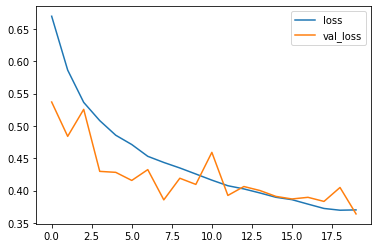

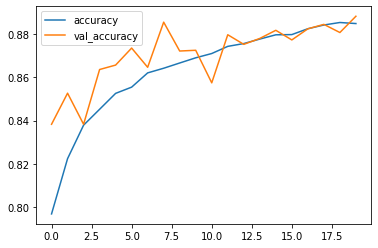

In [118]:
df_cnn = pd.DataFrame(history_cnn.history)
df_cnn.plot(y= ["loss","val_loss"],use_index = True)
df_cnn.plot(y= [ "accuracy","val_accuracy"] , use_index = True)

In [119]:
model_cnn.evaluate(test_x_grey,to_categorical(test_y,10))

814/814 [==============================] - 10s 12ms/step - loss: 0.4206 - accuracy: 0.8775


[0.4206116795539856, 0.877535343170166]

## 4. Get model predictions
* Load the **best weights** for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [120]:
best_mlp = get_model()
best_mlp.load_weights('model/best_model')

In [121]:
best_cnn = get_cnn_model()
best_cnn.load_weights('model_cnn/best_model')

In [122]:
def show_pictures_withpred(indices,tset,tlabel,model):
    
    fig , axlist = plt.subplots(ncols = 2, nrows = 5,figsize = (15,7))
    
    for ind  in range(0,len(indices)*2-1,2):
        pind = int(ind/2)
        im = tset[pind]
        distrib = model.predict(im[np.newaxis,...])
        distrib = np.reshape(distrib,(10,))
        pred = np.argmax(distrib)
        if(pred == 0):  pred = 10 
        label = tlabel[pind]
        if(label == 0) : label = 10
        axlist.ravel()[ind].set_axis_off()
        axlist.ravel()[ind].set_title('Label : {} , Pred : {}'.format(label, pred))
        axlist.ravel()[ind].imshow(tset[pind,:,:,0])
        axlist.ravel()[ind + 1].bar(np.arange(0,10) , height=distrib)
        
    fig.tight_layout()

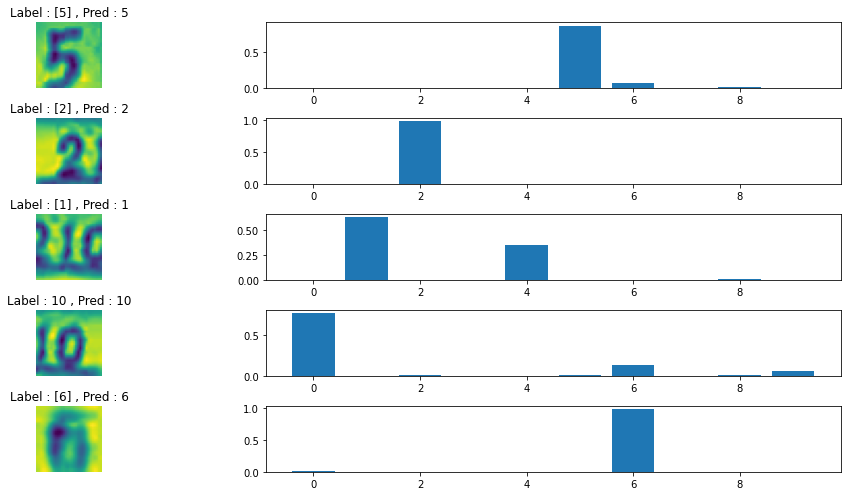

In [123]:
indices = np.random.randint(1,test_x_grey.shape[0],(5,))
show_pictures_withpred(indices,test_x_grey,test_y,best_cnn)

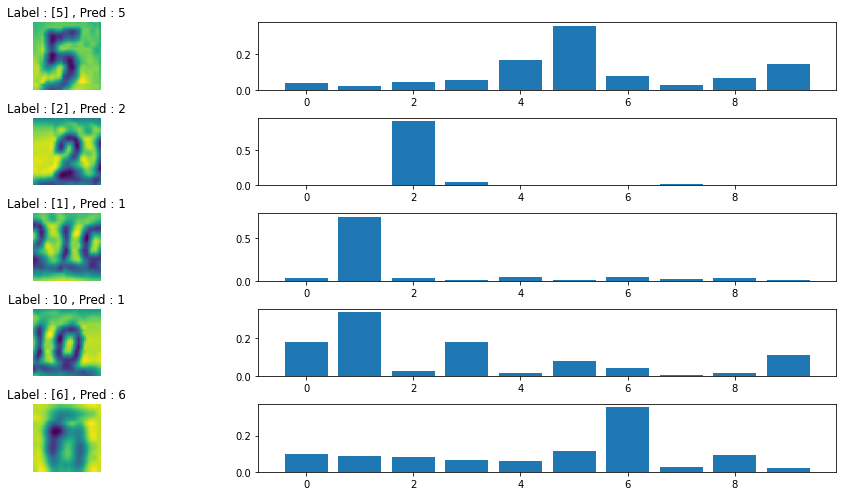

In [124]:
show_pictures_withpred(indices,test_x_grey,test_y,best_mlp)

In [125]:
best_cnn.compile(loss = 'categorical_crossentropy',optimizer='adam' , metrics = ['accuracy'])
best_mlp.compile(loss = 'categorical_crossentropy',optimizer='adam' , metrics = ['accuracy'])

In [126]:
test_y_cat = to_categorical(test_y,10)
_ , cnn_acc = best_cnn.evaluate(test_x_grey,test_y_cat)
_ , mlp_acc = best_mlp.evaluate(test_x_grey,test_y_cat)

814/814 [==============================] - 2s 2ms/step - loss: 1.0564 - accuracy: 0.6791


In [127]:
print('Best Accuracy on mlp : {}\nBest Accuracy on cnn : {}'.format(mlp_acc,cnn_acc))

Best Accuracy on mlp : 0.6790872812271118
Best Accuracy on cnn : 0.877535343170166
